# Pairplot: Visualizing High Dimensional Data

This example provides how to visualize high dimensional data using the pairplot.

In [1]:
import graspologic

import numpy as np
%matplotlib inline

/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packag

/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/runner/work/graspologic/graspologic/graspologic/models/edge_swaps.py:215: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  _edge_swap_numba = nb.jit(_edge_swap, nopython=False)


## Simulate a binary graph using stochastic block model
The 3-block model is defined as below:

\begin{align*}
n &= [50, 50, 50]\\
P &= 
\begin{bmatrix}0.5 & 0.1 & 0.05 \\
0.1 & 0.4 & 0.15 \\
0.05 & 0.15 & 0.3
\end{bmatrix}
\end{align*}

Thus, the first 50 vertices belong to block 1, the second 50 vertices belong to block 2, and the last 50 vertices belong to block 3.

In [2]:
from graspologic.simulations import sbm

n_communities = [50, 50, 50]
p = [[0.5, 0.1, 0.05], 
     [0.1, 0.4, 0.15], 
     [0.05, 0.15, 0.3],]

np.random.seed(2)
A = sbm(n_communities, p)

## Embed using adjacency spectral embedding to obtain lower dimensional representation of the graph

The embedding dimension is automatically chosen. It should embed to 3 dimensions.

In [3]:
from graspologic.embed import AdjacencySpectralEmbed

ase = AdjacencySpectralEmbed()
X = ase.fit_transform(A)

print(X.shape)

(150, 3)


## Use pairplot to plot the embedded data

First we generate labels that correspond to blocks. We pass the labels along with the data for pair plot.

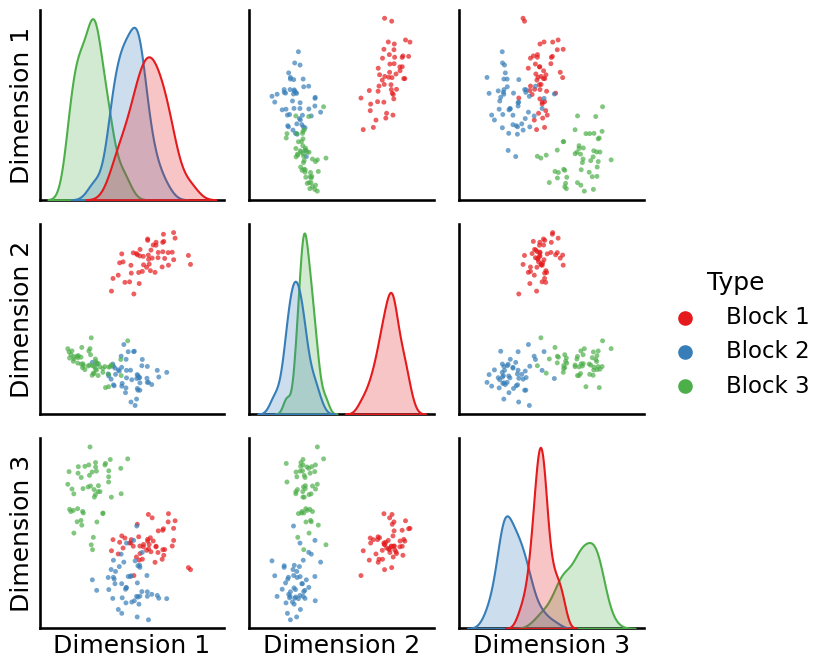

In [4]:
from graspologic.plot import pairplot

labels = ['Block 1'] * 50 + ['Block 2'] * 50 + ['Block 3'] * 50

plot = pairplot(X, labels)